# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?
The data provided by the College Bored, gives the average SAT math and verbal scores as well as the participation rate for each state, including the District of Columbia, for the year 2001.

##### 2. Does the data look complete? Are there any obvious issues with the observations?
##### Yes, the data looks complete.
-The data contains 53 rows<br />
-The first row contains the column names followed by 51 rows that contain all 50 states and Washington, D.C.<br />
-The final row is the benchmarks for the entire dataset<br />

##### 3. Create a data dictionary for the dataset.
| COLUMN NAME  | DESCRIPTION                                                       |
| -------------| ----------------------------------------------------------------- |
| State        | Two-Letter abbreviation for each state including Washington, D.C. |
| Rate         | Value representing the number of participents in 2001             |
| Verbal       | Value representing the average verbal score by state              |
| Math         | Value representing the average math score by state                |

## Step 2: Load the data.

##### 3. Load the data into a list of lists

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
data_source = '../../DSI-BOS-students/apasciuto/datasets/w1_sat_scores.csv'
dataset = []

with open(data_source, 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        dataset.append(row)
file.close()

##### 4. Print the data

In [53]:
dataset

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL

##### 5. Extract a list of the labels from the data, and remove them from the data.

In [7]:
# Extract row 0 containing the labels for the dataset (zero-based indexing)
labels = dataset[0]
labels

['State', 'Rate', 'Verbal', 'Math']

In [20]:
# Extract rows 1 through the length of the dataset, excluding the last row (last row contains inconclusive items)
data = dataset[1:len(dataset)-1]
data

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],
 ['NM', '13', '551', '542'],
 ['IL', '12', '576', '589'],
 ['KY', '12', 

In [11]:
# Create a variable for the row containing inconclusive items
inconclusive = dataset[len(dataset)-1]
inconclusive

['All', '45', '506', '514']

##### 6. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [25]:
state_names = [row[labels.index('State')] for row in data]
state_names

['CT',
 'NJ',
 'MA',
 'NY',
 'NH',
 'RI',
 'PA',
 'VT',
 'ME',
 'VA',
 'DE',
 'MD',
 'NC',
 'GA',
 'IN',
 'SC',
 'DC',
 'OR',
 'FL',
 'WA',
 'TX',
 'HI',
 'AK',
 'CA',
 'AZ',
 'NV',
 'CO',
 'OH',
 'MT',
 'WV',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

##### 7. Print the types of each column

In [19]:
[type(item) for item in data[0]]

[str, str, str, str]

##### 8. Do any types need to be reassigned? If so, go ahead and do it.

In [35]:
rate = labels.index('Rate')
math = labels.index('Math')
verbal = labels.index('Verbal')

for row in data:
    row[rate] = int(row[rate])
    row[math] = int(row[math])
    row[verbal] = int(row[verbal])

[type(item) for item in data[0]]

[str, int, int, int]

##### 9. Create a dictionary for each column mapping the State to its respective value for that column. 

In [36]:
state_rate = {}
state_math = {}
state_verbal = {}

for row in data:
    state_rate[row[0]] = row[rate]
    state_math[row[0]] = row[math]
    state_verbal[row[0]] = row[verbal]

##### 10. Create a dictionary with the values for each of the numeric columns

In [41]:
data_dictionary = {'rate': [row[labels.index('Rate')] for row in data],
             'math': [row[labels.index('Math')] for row in data],
             'verbal': [row[labels.index('Verbal')] for row in data]
            }
data_dictionary

{'math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551],
 'rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4],
 'verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  561,
  580,
  577,
  559,
  562,
  567,
  577,
  564,
  584,
  562,
 

## Step 3: Describe the data

##### 11. Print the min and max of each column

In [42]:
print('Rate:')
print(' - min:', min(data_dictionary['rate']))
print(' - max:', max(data_dictionary['rate']),"\n")

print('Math:')
print(' - min:', min(data_dictionary['math']))
print(' - max:', max(data_dictionary['math']),"\n")

print('Verbal:')
print(' - min:', min(data_dictionary['verbal']))
print(' - max:', max(data_dictionary['verbal']))

Rate:
 - min: 4
 - max: 82 

Math:
 - min: 439
 - max: 603 

Verbal:
 - min: 482
 - max: 593


##### 12. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [43]:
def std_dev(column):
    values = data_dictionary[column]
    var = [(x - np.mean(values))**2 for x in values]
    stdev = (np.sum(var)/len(values))**(0.5)
    return(stdev)

In [44]:
print('Rate Standard Deviation:')
print(standard_deviation(data_dict['rate']),"\n")

print('Math Standard Deviation:')
print(standard_deviation(data_dict['math']),"\n")

print('Verbal Standard Deviation:')
print(standard_deviation(data_dict['verbal']))

Rate Standard Deviation:
27.550680572356104 

Math Standard Deviation:
36.28739315465888 

Verbal Standard Deviation:
33.360667224248665


## Step 4: Visualize the data

##### 13. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

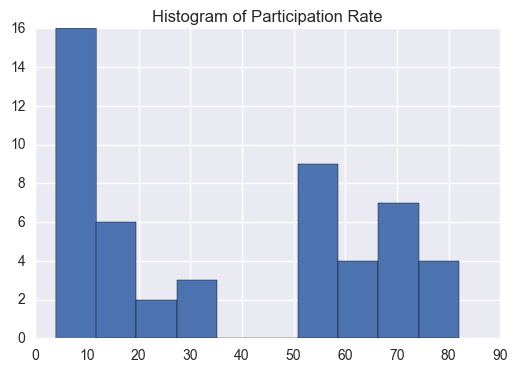

In [45]:
plt.title('Histogram of Participation Rate')
plt.hist(data_dictionary['rate'])
plt.show()

##### 14. Plot the Math distribution

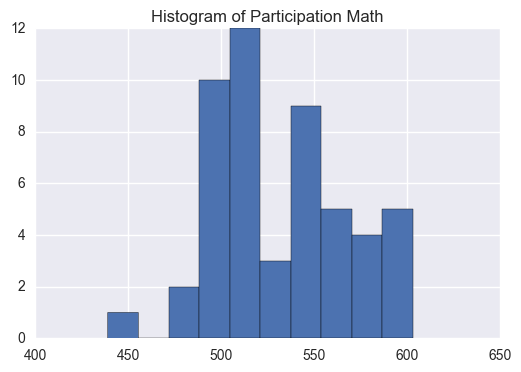

In [46]:
plt.title('Histogram of Participation Math')
plt.hist(data_dictionary['math'])
plt.show()

##### 15. Plot the Verbal distribution

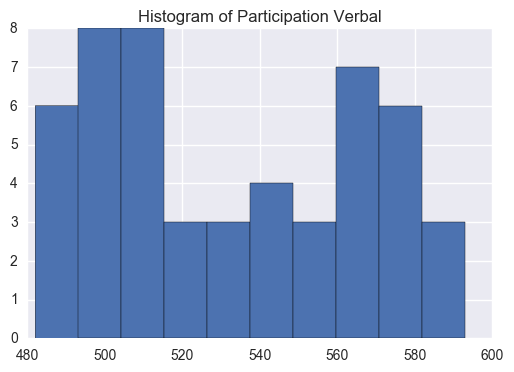

In [47]:
plt.title('Histogram of Participation Verbal')
plt.hist(data_dictionary['verbal'])
plt.show()

##### 16. What is the typical assumption for data distribution?
Normal Distribution

##### 17. Does that distribution appear to hold true for our data?
No

##### 18. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

NameError: name 'col_dict' is not defined

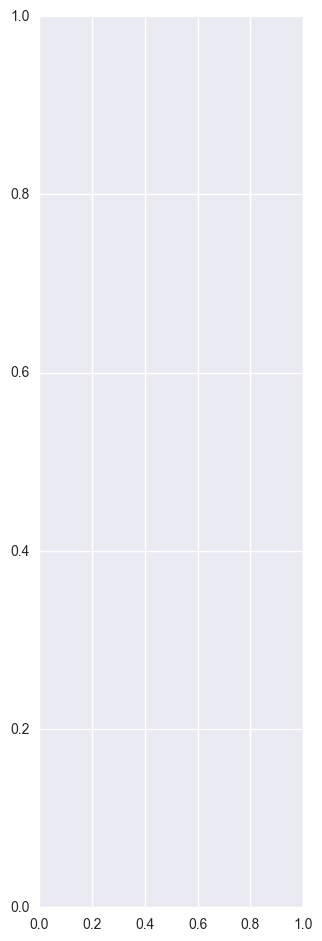

In [63]:

fig1 = plt.figure()
fig1.set_size_inches(7.5, 11.5)
ax1 = fig1.add_subplot(1,2,1)
ax1.scatter(col_dict['rate'], col_dict['verbal'], color = "r", label = "Verbal")
ax1.set_ylim(400,650)
ax2 = fig1.add_subplot(1,2,2)
ax2.scatter(col_dict['rate'], col_dict['math'], color = "g", label = "Math")
fig1.text(0.5, 0.03, "Participation rate", va = "center", ha = "center")
fig1.text(0.04, 0.4, "Average score", va = "center", ha = "center", rotation = "vertical")
ax1.legend(loc = "upper right")
ax2.legend(loc = "upper right")
plt.show()

fig2 = plt.figure(figsize = (21,3))
ax3 = fig2.add_subplot(1,3,3)
ax3.scatter(col_dict['math'], col_dict['verbal'])
ax3.set_ylim(400,650)
ax3.set_ylabel("Average Verbal Score")
ax3.set_xlabel("Average Math Score")
plt.show()

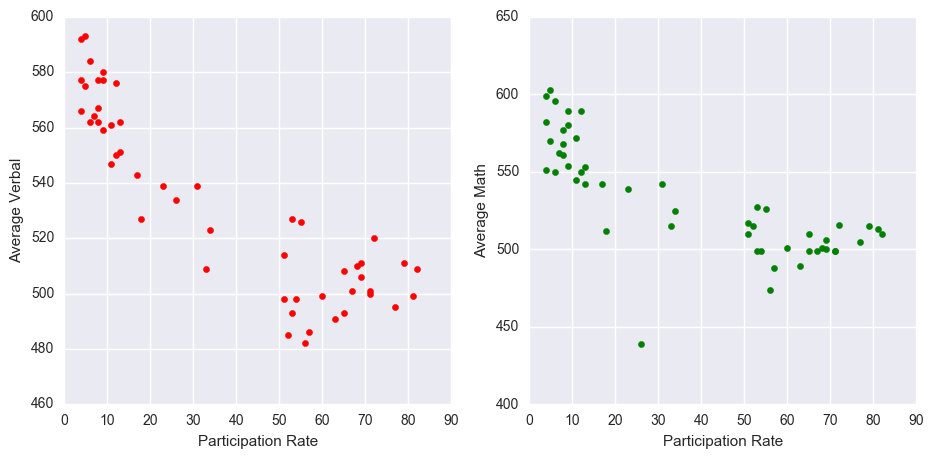

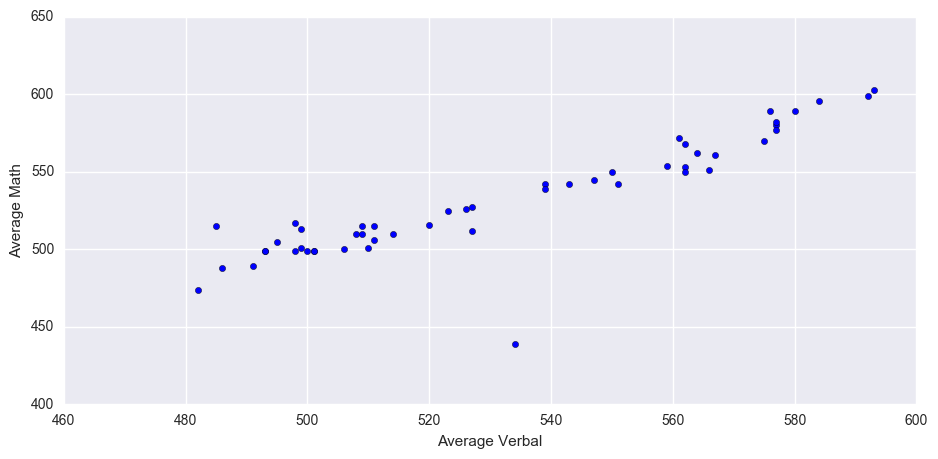

In [69]:
fig1 = plt.figure()
fig1.set_size_inches(11, 5)

ax1 = fig1.add_subplot(1,2,1)
ax1.set_xlabel('Participation Rate')
ax1.set_ylabel('Average Verbal')
ax1.scatter(data_dict['rate'], data_dict['verbal'], color='r')

ax2 = fig1.add_subplot(1,2,2)
ax2.set_xlabel('Participation Rate')
ax2.set_ylabel('Average Math')
ax2.scatter(data_dict['rate'], data_dict['math'], color='g')

fig2 = plt.figure()
fig2.set_size_inches(11, 5)
figsize = (21,3)
ax3 = fig2.add_subplot(1,1,1)
ax3.set_xlabel('Average Verbal')
ax3.set_ylabel('Average Math')
ax3.scatter(data_dict['verbal'], data_dict['math'])

##### 19. Are there any interesting relationships to note?
The correlation between math and verbal scores is much stronger compared to the correlation between rate and math/verbal.

##### 20. Create box plots for each variable. 

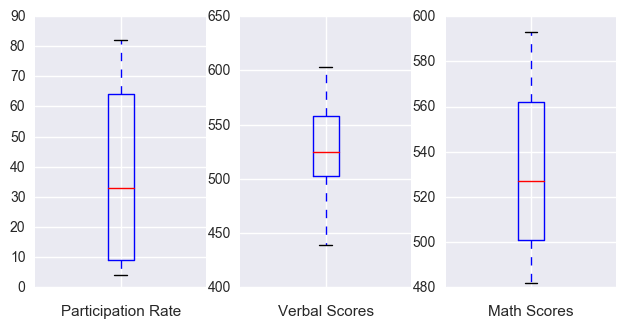

In [71]:
fig = plt.figure()
fig.set_size_inches(7.5, 3.5)

ax1 = fig.add_subplot(131)
ax1.boxplot(data_dict['rate'])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xticklabels([])
ax1.tick_params(bottom='off', top='off', right='off')
ax1.set_xlabel('Participation Rate')

ax2 = fig.add_subplot(132)
ax2.boxplot(data_dict['math'])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xticklabels([])
ax2.tick_params(bottom='off', top='off', right='off')
ax2.set_xlabel('Verbal Scores')

ax3 = fig.add_subplot(133)
ax3.boxplot(data_dict['verbal'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_xticklabels([])
ax3.tick_params(bottom='off', top='off', right='off')
ax3.set_xlabel('Math Scores')